Dataset Overview:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         94

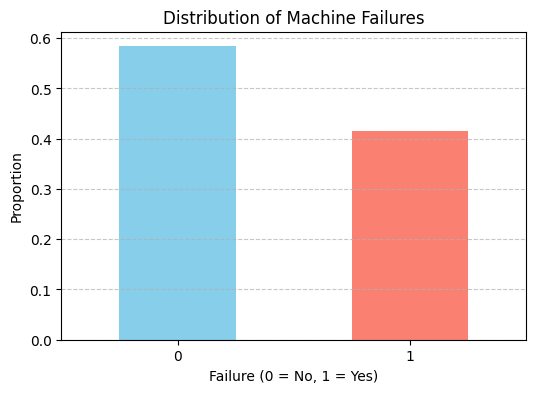

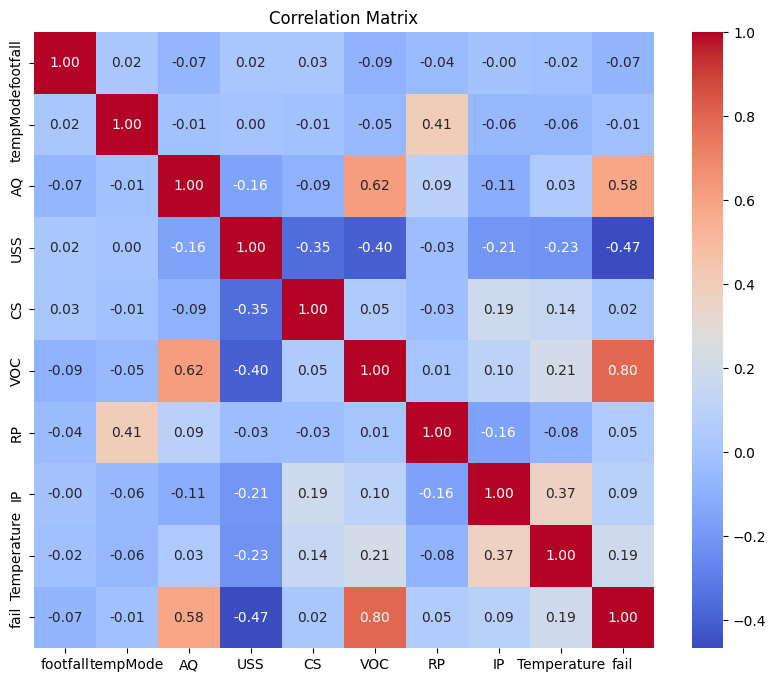


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       110
           1       0.90      0.92      0.91        79

    accuracy                           0.93       189
   macro avg       0.92      0.93      0.92       189
weighted avg       0.93      0.93      0.93       189


Confusion Matrix:


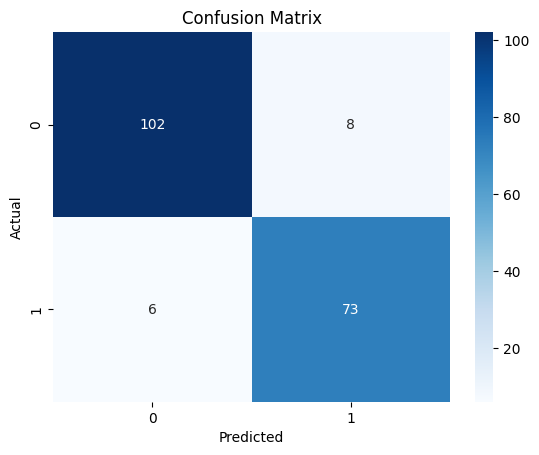


Accuracy Score:
0.9259259259259259

Model Saved as 'machine_failure_model.pkl'


In [2]:
# Machine Failure Prediction Project

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load Dataset
file_path = 'xml sheet/xml file/data (1).csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Step 3: Data Overview
print("Dataset Overview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Step 4: Check Target Distribution
print("\nTarget Variable Distribution:")
fail_distribution = data['fail'].value_counts(normalize=True)
print(fail_distribution)

# Visualize Target Distribution
plt.figure(figsize=(6, 4))
fail_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Machine Failures')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 6: Data Preprocessing
# Separate features and target variable
X = data.drop(columns=['fail'])
y = data['fail']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Model Development
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Step 9: Save the Model (Optional)
import joblib
joblib.dump(rf_model, 'machine_failure_model.pkl')

print("\nModel Saved as 'machine_failure_model.pkl'")
